In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/time series/air passengers/AirPassengers.csv')

In [ ]:
data['Month'] = pd.to_datetime(data['Month'])
data['Passengers'] = data['#Passengers']

In [ ]:
data = data.set_index(data['Month'])

In [ ]:
data = data.drop(['Month','#Passengers'], axis = 1)

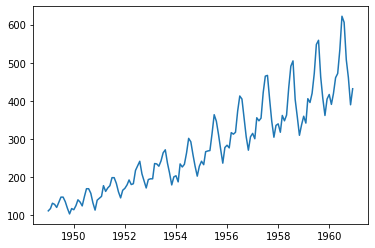

In [ ]:
plt.plot(data)

# rolling statistics

In [ ]:
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01  126.666667
1950-01-01  126.916667
1950-02-01  127.583333
1950-03-01  128.333333
            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   13.720147
1950-01-01   13.453342
1950-02-01   13.166475
1950-03-01   13.686977


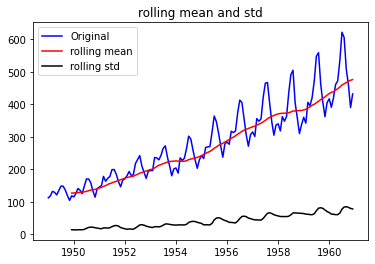

In [ ]:
rolmean = data.rolling(window = 12).mean()
rolstd = data.rolling(window = 12).std()
orginal = plt.plot(data, color = 'blue', label = 'Original')
mean = plt.plot(rolmean,color = 'red', label = 'rolling mean')
std = plt.plot(rolstd, color = 'black', label = 'rolling std')
plt.legend(loc = 'best')
plt.title('rolling mean and std')
plt.show(block = False)

# DICKEY FULLER TEST

In [ ]:
def stationary(data):
  from statsmodels.tsa.stattools import adfuller
  dftest=adfuller(data, autolag='AIC')
  dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
  for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

In [ ]:
stationary(data['Passengers'])

Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


#method - 1

In [ ]:
data_log = np.log(data['Passengers'])

In [ ]:
method_1 = data_log - data_log.shift(1)

In [ ]:
method_1 = method_1.dropna()

In [ ]:
stationary(method_1)

Test Statistic           -2.717131
p-value                   0.071121
Lags Used                14.000000
No. of Obs              128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


#method - 2

In [ ]:
method_2 = data_log - data_log.rolling(window=3).mean()
method_2 = method_2.dropna()

In [ ]:
stationary(method_2)

Test Statistic           -3.040034
p-value                   0.031321
Lags Used                11.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)


<Figure size 1440x720 with 0 Axes>

In [ ]:
predicted = results.predict(start='1960-01-01	', end = '1960-12-01	' )

In [ ]:
predictions_arima = pd.Series(predicted, copy=True)

In [ ]:
predictions_arima_cumsum = predictions_arima.cumsum()

In [ ]:
predictions_arima_log  = pd.Series(data_log)

In [ ]:
predictions_arima_log = predictions_arima_log.add(predictions_arima_cumsum, fill_value=0)

In [ ]:
predictions_ARIMA = np.exp(predictions_arima_log)


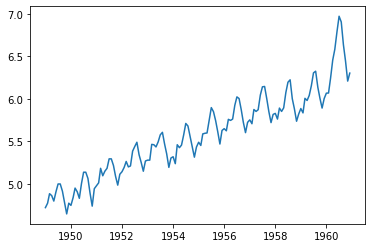

In [ ]:
import matplotlib.pyplot as plt
plt.plot(predictions_arima_log)

method - 1

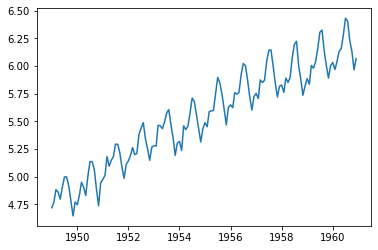

In [ ]:
data_log = np.log(data)
plt.plot(data_log)

In [ ]:
Mavg = data_log.rolling(window=12).mean()
Mstd = data_log.rolling(window=12).std()

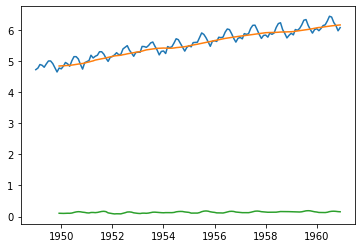

In [ ]:
plt.plot(data_log)
plt.plot(Mavg)
plt.plot(Mstd)

In [ ]:
data_log_diff = data_log - Mavg
data_log_diff.head()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


In [ ]:
data_log_diff = data_log_diff.dropna()
data_log_diff.head()

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [ ]:
def stationarity(timeseries):
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

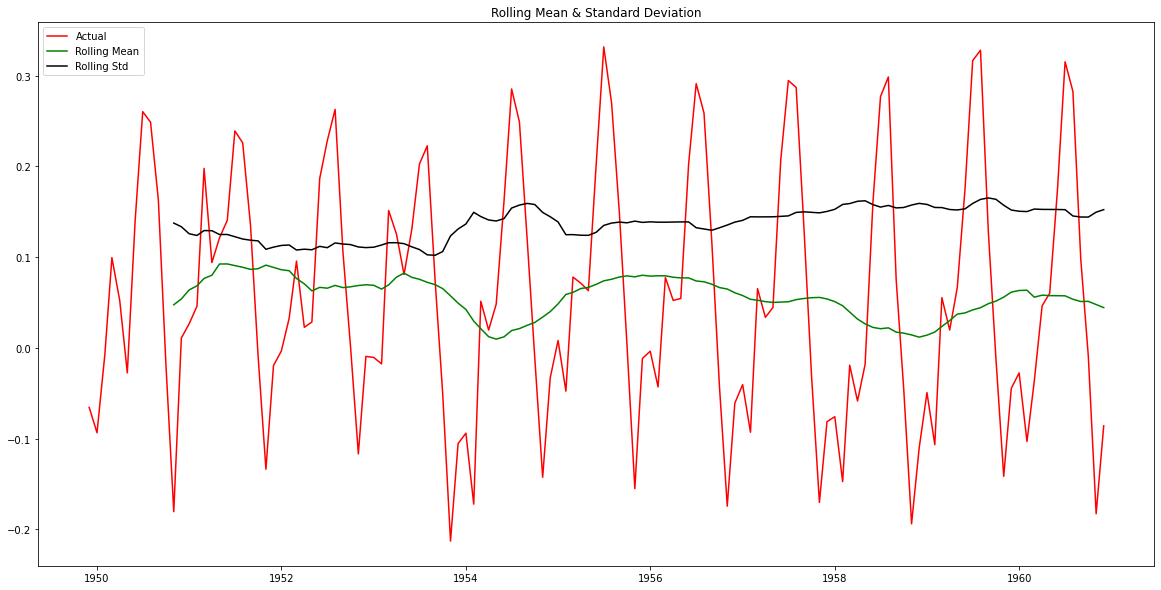

Dickey-Fuller Test: 
Test Statistic           -3.162908
p-value                   0.022235
Lags Used                13.000000
No. of Obs              119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [ ]:
stationarity(data_log_diff)


method - 2

In [ ]:
exp_data = data_log.ewm(halflife=12,min_periods=0,adjust=True).mean()


In [ ]:
exp_data_diff = data_log- exp_data

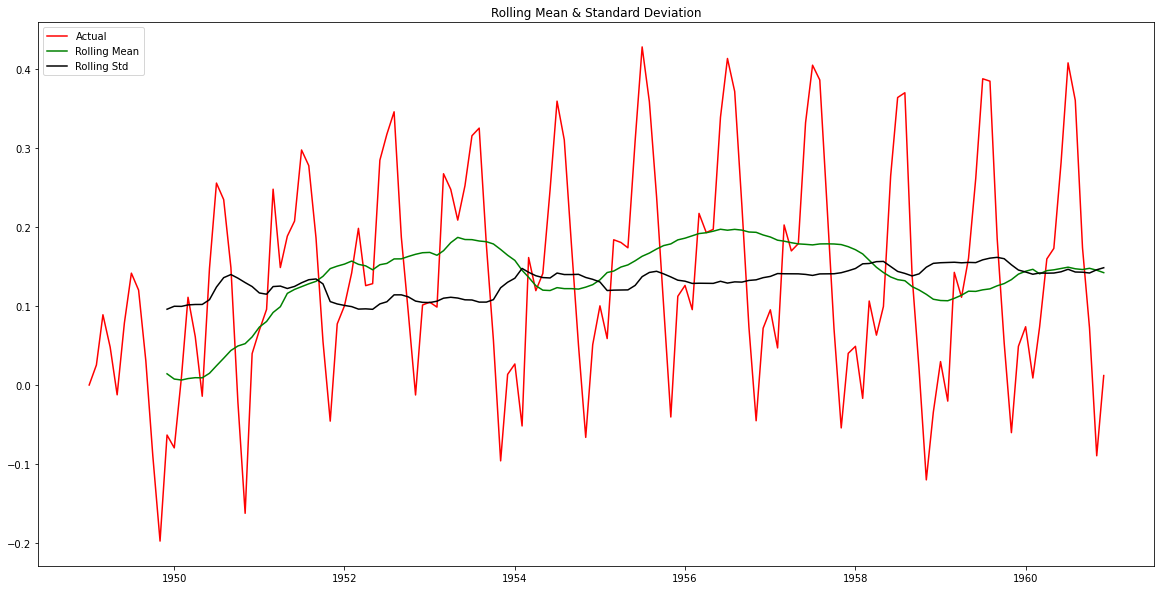

Dickey-Fuller Test: 
Test Statistic           -3.601262
p-value                   0.005737
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [ ]:
stationarity(exp_data_diff)

method - 3

In [ ]:
data_shift = data_log - data_log.shift()

In [ ]:
data_shift = data_shift.dropna()

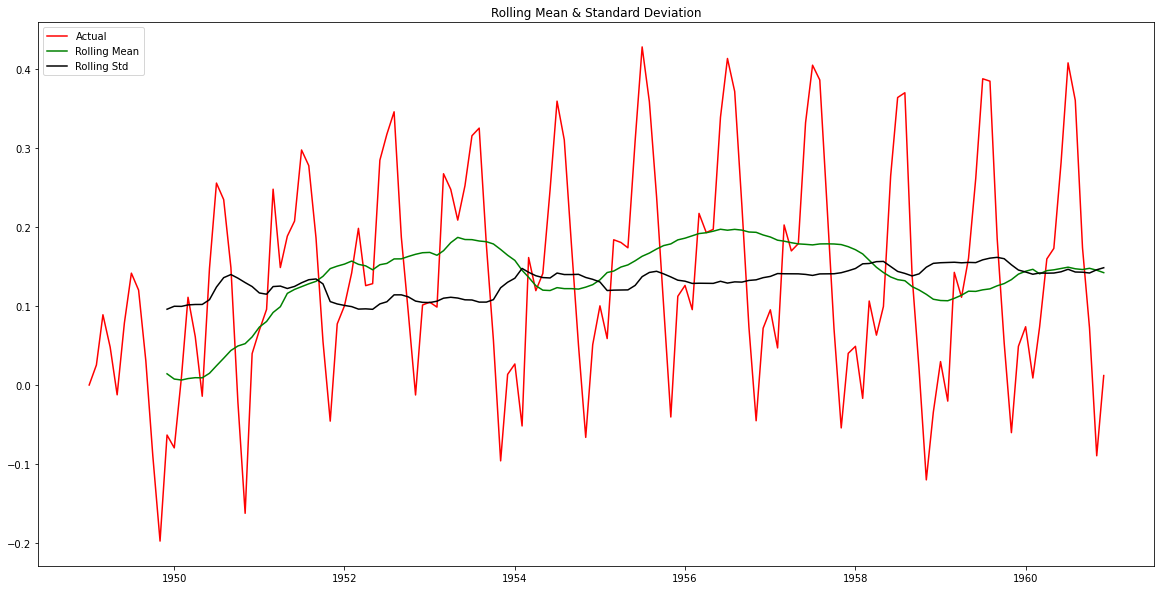

Dickey-Fuller Test: 
Test Statistic           -3.601262
p-value                   0.005737
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [ ]:
stationarity(exp_data_diff)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


plotting ARIMA model


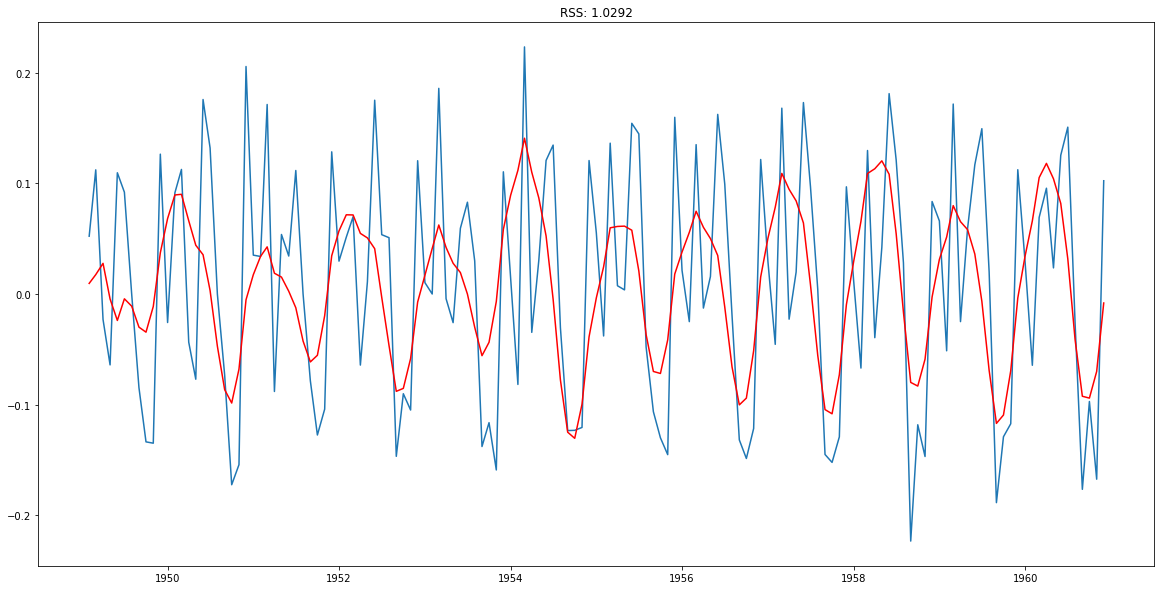

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['Passengers'])**2))
print('plotting ARIMA model')

In [ ]:
results

In [ ]:
predictions = pd.Series(results.fittedvalues, copy = True)

In [ ]:
print(predictions.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [ ]:
predictions_cum_sum = predictions.cumsum()
print(predictions_cum_sum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [ ]:
predictions_log = pd.Series(data_log['Passengers'], index = data_log.index)
predictions_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: Passengers, dtype: float64

In [ ]:
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.780265
1949-03-01    4.909873
1949-04-01    4.914554
1949-05-01    4.846011
dtype: float64

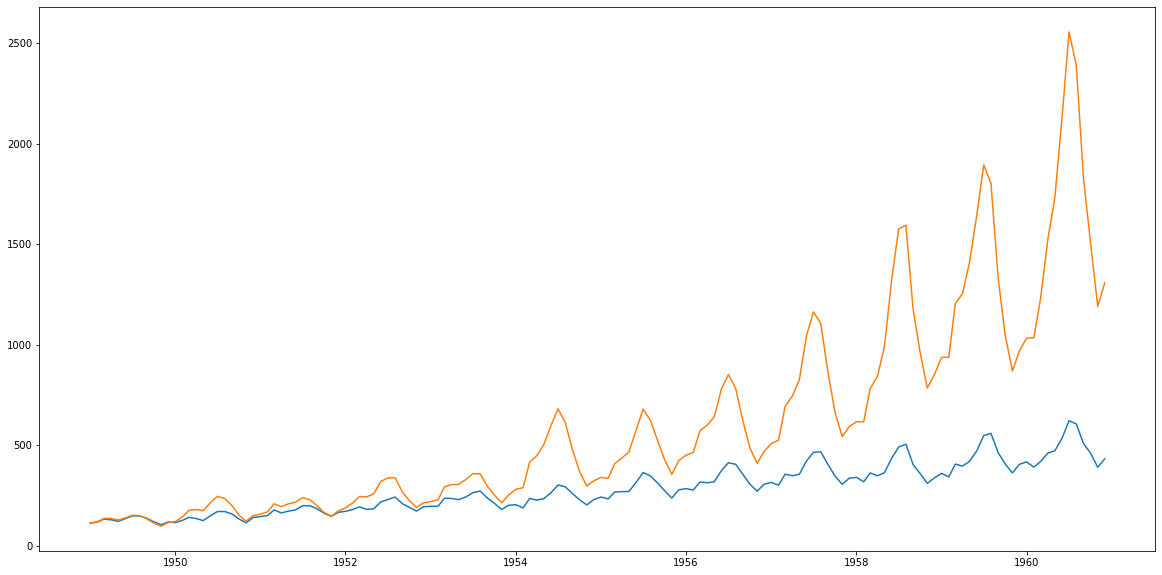

In [ ]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

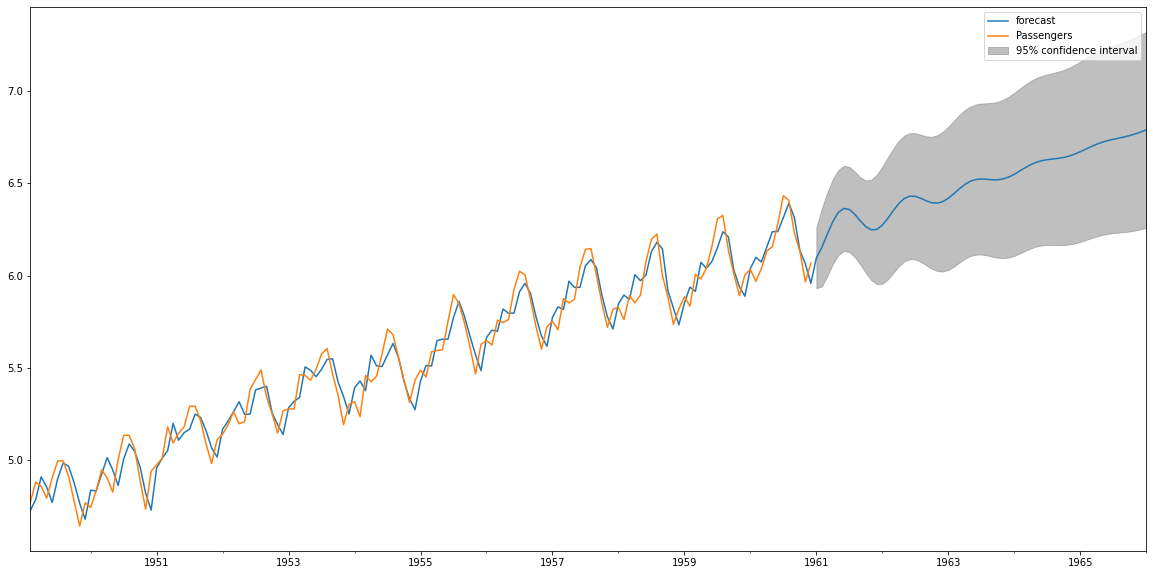

In [ ]:
plt.rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

In [ ]:
results.forecast(steps=120)


(array([6.09553405, 6.15281422, 6.22442985, 6.29241113, 6.34164717,
        6.36359351, 6.35784666, 6.33139283, 6.29597523, 6.26447706,
        6.24738329, 6.25025185, 6.27275854, 6.30940329, 6.35151504,
        6.38988657, 6.41727373, 6.43011038, 6.42906671, 6.41842473,
        6.40456145, 6.39403614, 6.3918309 , 6.40019516, 6.41833707,
        6.44295419, 6.46937441, 6.49293984, 6.5102411 , 6.51989021,
        6.52267565, 6.52112377, 6.51864522, 6.51853691, 6.5231193 ,
        6.53322371, 6.5481288 , 6.56591565, 6.58410312, 6.60036538,
        6.6131326 , 6.62192772, 6.6273778 , 6.63093123, 6.63438687,
        6.63937988, 6.64696511, 6.65739849, 6.67015332, 6.68414256,
        6.69806628, 6.710779  , 6.72157728, 6.73033979, 6.73749806,
        6.74386376, 6.75037323, 6.75782596, 6.76668687, 6.77699829,
        6.78841325, 6.80032857, 6.81207196, 6.82308759, 6.83307134,
        6.8420249 , 6.85022311, 6.85811221, 6.86617342, 6.87479154,
        6.88416307, 6.89426389, 6.90487894, 6.91

# estimating trend

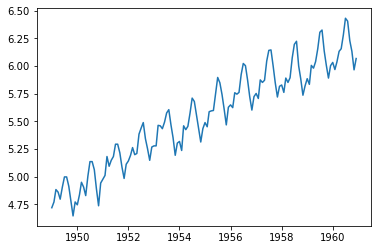

In [ ]:
estimating_trend = np.log(data)
plt.plot(estimating_trend)

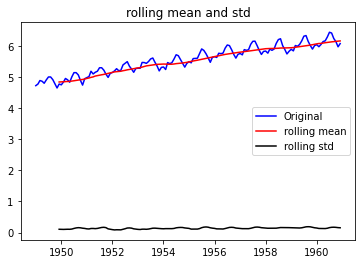

In [ ]:
rolmean = estimating_trend.rolling(window = 12).mean()
rolstd = estimating_trend.rolling(window = 12).std()
orginal = plt.plot(estimating_trend, color = 'blue', label = 'Original')
mean = plt.plot(rolmean,color = 'red', label = 'rolling mean')
std = plt.plot(rolstd, color = 'black', label = 'rolling std')
plt.legend(loc = 'best')
plt.title('rolling mean and std')
plt.show(block = False)